# Gradient Descent

In [1]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler

In [2]:
X,y = datasets.fetch_california_housing(return_X_y=True)
print(X.shape)

(20640, 8)


In [3]:
X_train_temp1 = X[0:16000,:]  #split into train and test
X_train = np.ones((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))  #putting extra column for dummy variable
X_train[:,1:] = X_train_temp1  #now our X_train is ready with dummy variable

In [4]:
#doing same as above for test inputs
X_test_temp1 = X[16000:,:]
X_test = np.ones((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))  
X_test[:,1:] = X_test_temp1 

y_train=y[:16000]
y_test=y[16000:]

In [5]:
#doing normalisation of actual parameters
#here 8 parameters
scaler=StandardScaler()
scaler.fit(X_train[:,1:])
X_train[:,1:] = scaler.transform(X_train[:,1:])
X_test[:,1:] = scaler.transform(X_test[:,1:])

In [6]:
#assume random values of all 9 parameters
theta=np.random.uniform(0,1,size=X_train.shape[1])

iter=1000
alpha=0.01

m=X_train.shape[0]
n=X_train.shape[1]

for i in range(iter):
    update = np.zeros(n)
    y_pred = np.dot(X_train,theta)
    error = y_pred - y_train
    
    for j in range(n):
        update[j] = np.sum(error*(X_train.T)[j])
        
    theta = theta - (alpha*update)/m
    
print(theta)

[ 2.02383278e+00  8.87680454e-01  2.39031099e-01 -2.75506561e-01
  2.44826842e-01  3.30200625e-02 -6.31202275e-02 -1.53412947e-03
  6.02794182e-02]


In [7]:
predictions=np.dot(X_test,theta)
print("MAE:", metrics.mean_absolute_error(y_true=y_test,y_pred=predictions))
print("MSE:", metrics.mean_squared_error(y_true=y_test,y_pred=predictions))

MAE: 0.6233970743296542
MSE: 0.7205854322047374


### Changing hyperparameters

<function matplotlib.pyplot.show(close=None, block=None)>

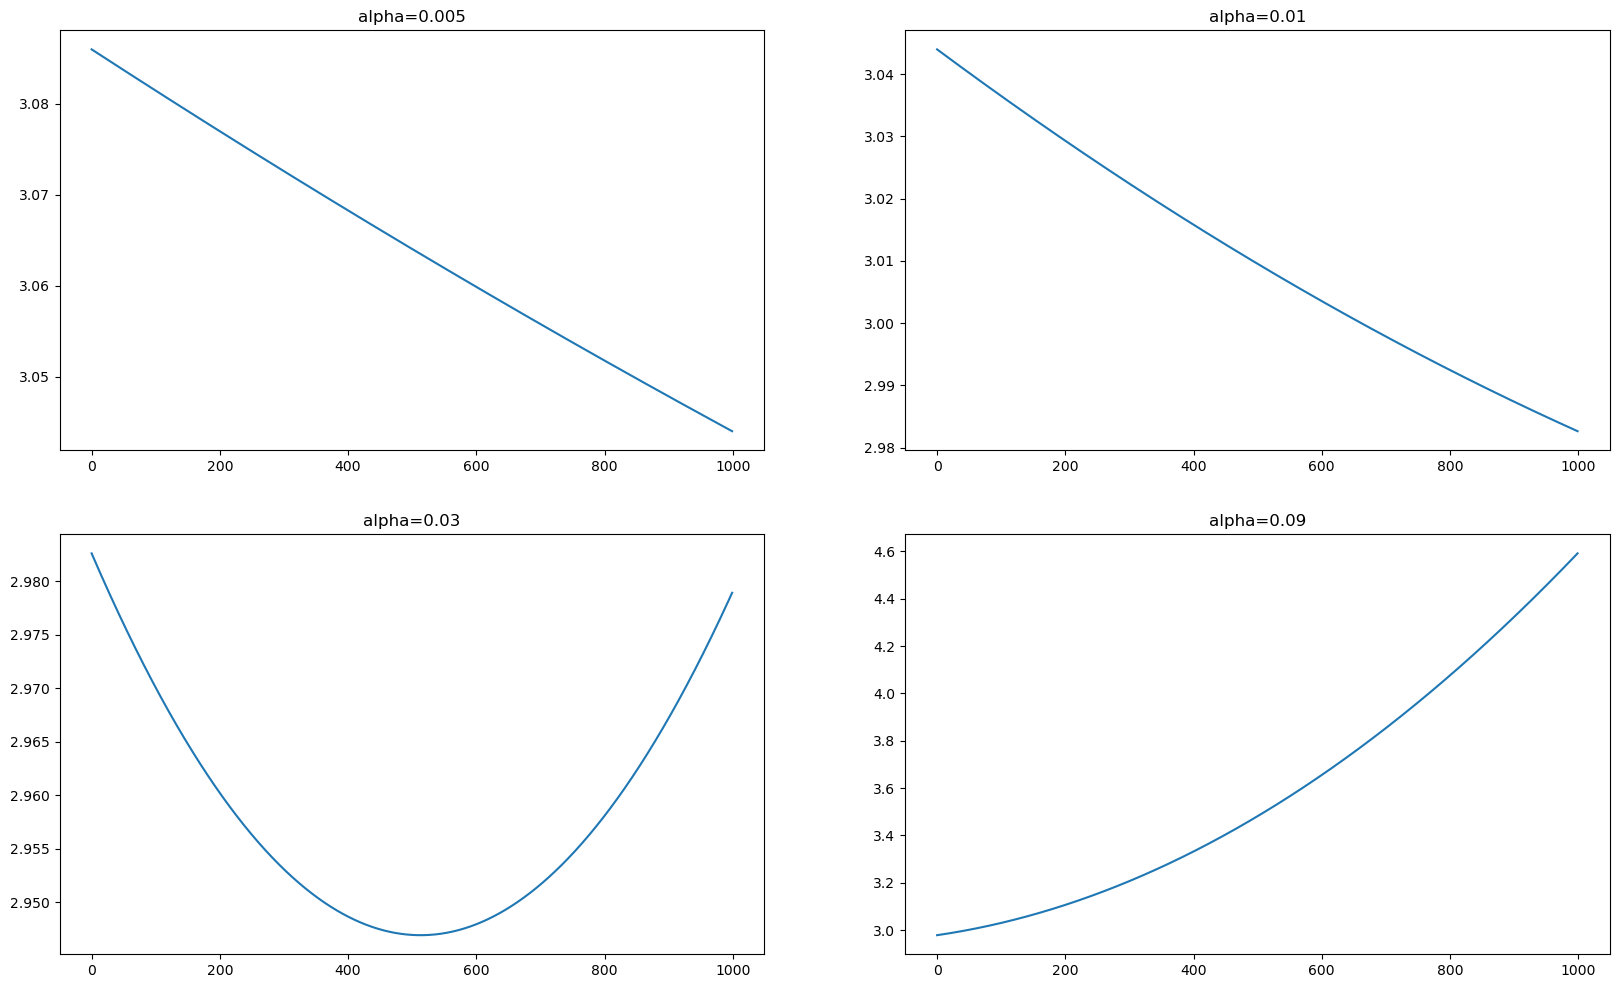

In [9]:
import matplotlib.pyplot as plt
theta=np.random.uniform(0,1,size=X_train.shape[1])

iter=1000
plt.figure(figsize=(20,12))
alpha=[0.005,0.01,0.03,0.09]
m=X_train.shape[0]
n=X_train.shape[1]

J=np.zeros(iter)
ct=1;
for al in alpha:
    for i in range(iter):
        update = np.zeros(n)
        y_pred = np.dot(X_train,theta)
        J[i] = (np.sum((y_pred - y_train)*(y_pred - y_train)))/(2*len(y_train))
    
        for j in range(n):
            update[j] = np.sum(error*(X_train.T)[j])
        
        theta = theta - (al*update)/m
    
    x=np.arange(1000)
    
    plt.subplot(2,2,ct)
    plt.plot(x,J)
    plt.title(f"alpha={al}")
    ct+=1
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

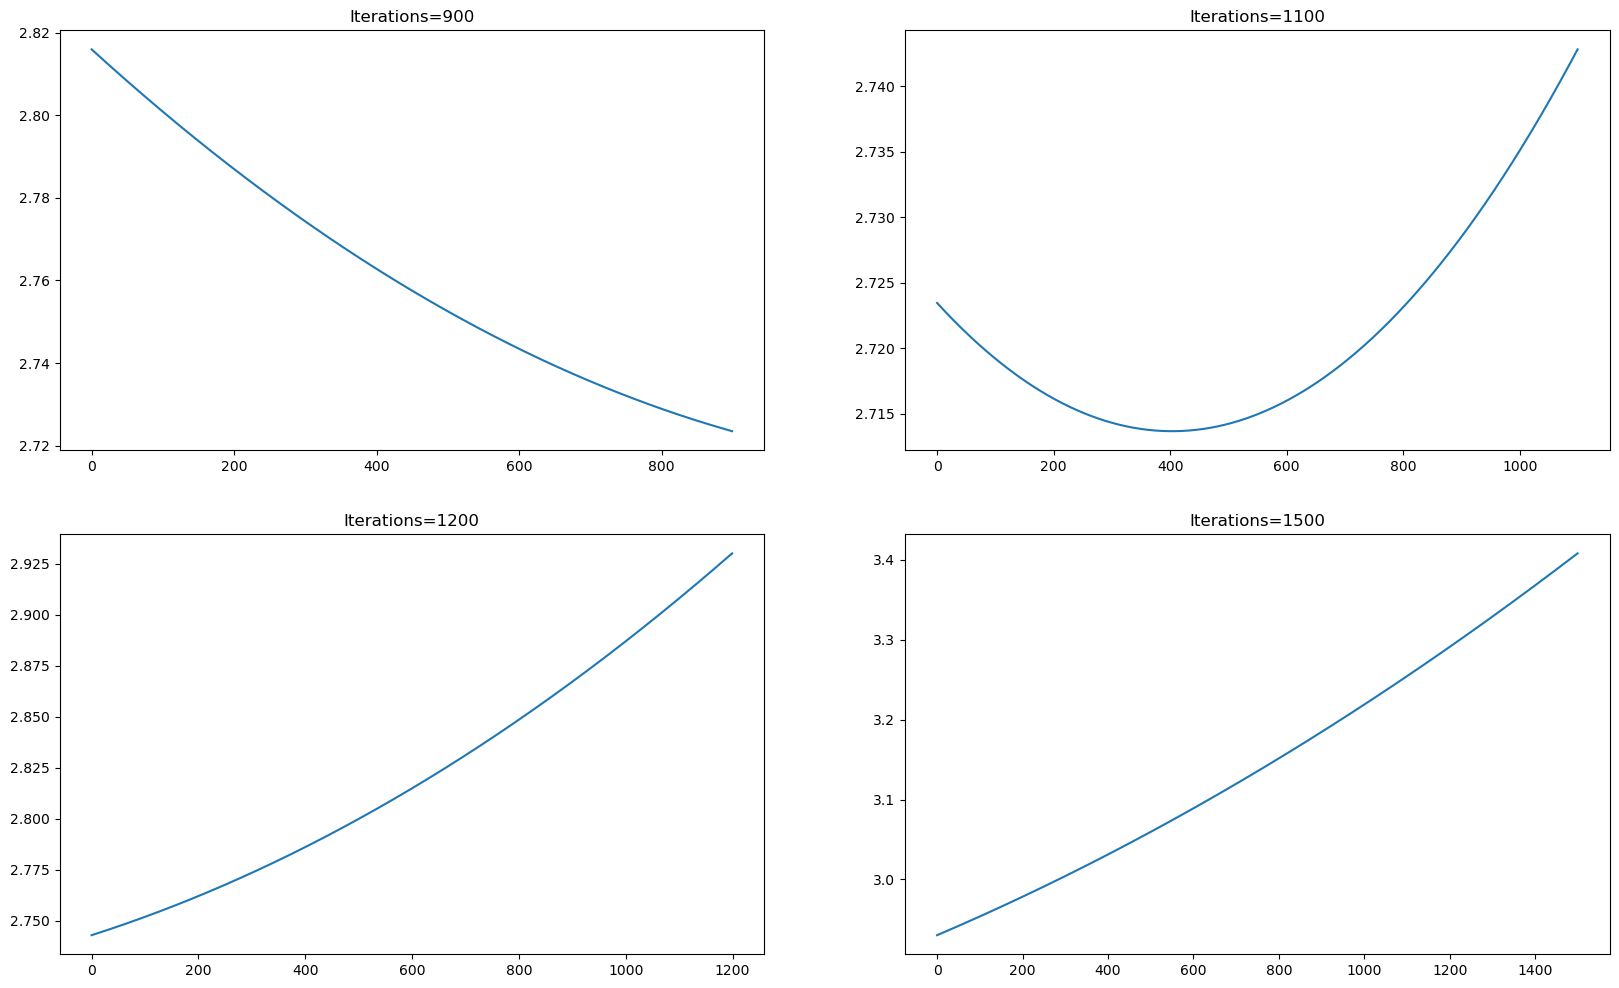

In [11]:
#comparision of gradient descent with same values of learning rate and different number of iter
import matplotlib.pyplot as plt

theta=np.random.uniform(0,1,size=X_train.shape[1])
alpha =0.02
iter=[900,1100,1200,1500]

plt.figure(figsize=(20,12))

m=X_train.shape[0]
n=X_train.shape[1]

ct=1;
for it in iter:
    J=np.zeros(it)
    for i in range(it):
        update = np.zeros(n)
        y_pred = np.dot(X_train,theta)
        J[i] = (np.sum((y_pred - y_train)*(y_pred - y_train)))/(2*len(y_train))
    
        for j in range(n):
            update[j] = np.sum(error*(X_train.T)[j])
        
        theta = theta - (alpha*update)/m
    
    x=np.arange(it)
    
    plt.subplot(2,2,ct)
    plt.plot(x,J)
    plt.title(f"Iterations={it}")
    ct+=1
plt.show

# Normalisation

In [12]:
import numpy as np
from sklearn import datasets, metrics
from numpy.linalg import inv,pinv,LinAlgError

In [13]:
X,y = datasets.fetch_california_housing(return_X_y=True)
print(X.shape)

(20640, 8)


In [14]:
X_train_temp1 = X[0:16000,:]  #split into train and test
X_train = np.ones((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))  #putting extra column for dummy variable
X_train[:,1:] = X_train_temp1  #now our X_train is ready with dummy variable

In [15]:
#doing same as above for test inputs
X_test_temp1 = X[16000:,:]
X_test = np.ones((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))  
X_test[:,1:] = X_test_temp1 

y_train=y[:16000]
y_test=y[16000:]

In [16]:
#normalisation method
theta = np.zeros(X_train.shape[1])

XTXi = pinv(np.dot(X_train.T,X_train)) #it returns inverse if possible, else it returns pseudo inverse
XTy = np.dot(X_train.T,y_train)

theta = np.dot(XTXi,XTy)
print(theta)

[-3.46674256e+01  4.51614159e-01  9.02991773e-03 -1.26544057e-01
  7.28292517e-01 -4.63897418e-06 -8.65766813e-03 -4.04037696e-01
 -4.10170580e-01]


In [17]:
#testing the dataset with calculated values of features
pred = np.dot(theta,X_test.T)

#calculating mae and mse
print("MAE: ",metrics.mean_absolute_error(y_test,pred))
print("MSE: ",metrics.mean_squared_error(y_test,pred))

MAE:  0.5183922115435409
MSE:  0.49606387990511314
